# Bike Sharing - BoomBike Assignment by Abhishek Singh

## Problem Statement 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


## Step 1 : Exploratory Data Analysis

### Loan Dataset Extraction

In [1]:
## import python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import io 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#Extracting the dataset of historical data and its cnt along with other details from .csv
bikesharing = pd.read_csv(r'C:\Users\SHWETA\Desktop\LR Case Study\day.csv')

In [3]:
# Displaying the fetched data, added to first 10 rows to manually visualize the data
bikesharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
#Below representing the number of rows - 730 & Column - 16
bikesharing.shape

(730, 16)

In [5]:
#Checking for the duplicate rows in dataset based on instant column
print(bikesharing.duplicated(subset=None,keep='first').count())
duplicate_data=bikesharing[bikesharing.duplicated(['instant'])]
duplicate_data

#There are no duplicate rows in dataset

730


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Dataset Cleanup

#### Missing Value Analysis

In [6]:
# Getting understanding general information of the variables like if NULL value is present and type of the variables
bikesharing.info()

#Obervation : No NULL value present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#NULL value analysis of the dataset in the form of percentage
print(bikesharing.isna().mean()*100)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


<AxesSubplot:>

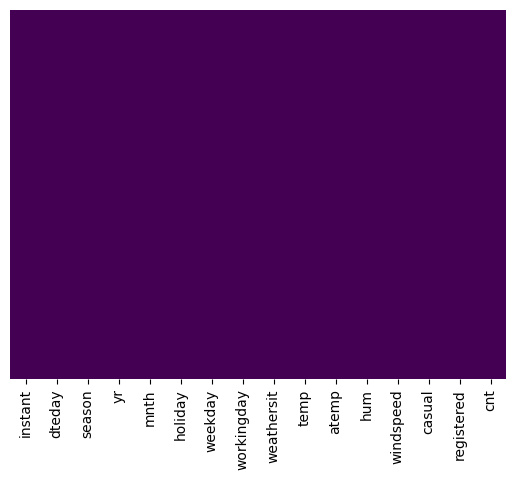

In [8]:
#Visualization of NULL value in the datasets
#Obeservation - No Null Values are present
sns.heatmap(bikesharing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# Checking unique count of values of each column
# This analysis will help in deciding which other column can be dropped from dataset
unique_counts = bikesharing.nunique().sort_values(ascending=True)

# Print the sorted unique value counts
print("Sorted unique value counts of each columns:")
print(unique_counts)

# Obervation - No variabe has a singular value hence no variable need to be dropped at this point

Sorted unique value counts of each columns:
yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64


In [10]:
#Dropping of  column Instand as its a index and date variable as date is already present in form of month and year
bikesharing.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bikesharing.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#Rename the columns for better understanding
bikesharing.rename(columns =\
                   {'yr':'Year','mnth':'Month','hum':'Humidity','cnt':'Count','holiday':'Holiday','workingday': 'Workingday','windspeed':'Windspeed','temp':'Temp'}\
                   , inplace = True) 
bikesharing.head(5)

,season,Year,Month,Holiday,weekday,Workingday,weathersit,Temp,atemp,Humidity,Windspeed,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bikesharing.columns

Index(['season', 'Year', 'Month', 'Holiday', 'weekday', 'Workingday',
       'weathersit', 'Temp', 'atemp', 'Humidity', 'Windspeed', 'Count'],
      dtype='object')

#### Reason of dropping above variables :
Variables were dropped since "instant" is index, dteday is redundant becasue of presence of mnth,yr & casual + registered = cnt and cnt is already considered as target variable(dependent variable)

## Step 2 : Data preparation & Visualization

### Visualization & Dataset row value standardization for categorical variable

In [13]:
# Checking unique values for the categorical variable having less than 15 different values in row
print(f'Year variable unique values: {bikesharing.Year.unique()}, (Dictionary - 0: 2018, 1: 2019)')
print(f'Holiday variable unique values: {bikesharing.Holiday.unique()}, (Dictionary - 0: Its not a holiday, 1: Its holiday)')
print(f'Workingday variable unique values: {bikesharing.Workingday.unique()}, (Dictionary - 0: Weekday and no holiday,1: Weekend or holiday)')
print(f'Weathersit variable unique values: {bikesharing.weathersit.unique()}, (Dictionary - 1: Clear 2: Mist 3: Light)')
print(f'Season variable unique values: {bikesharing.season.unique()}, (Dictionary - 1:Spring, 2:Summer, 3:Fall, 4:Winter)')
print(f'Weekday variable unique values: {bikesharing.weekday.unique()}, (Dictionary - [0 - 6] = [Sunday - Saturday])')
print(f'Month variable unique values: {bikesharing.Month.unique()}, (Dictionary - [1 - 12] = [JAN - DEC])')

# Observations - Year, Holiday, Working day is already in binary format hence not required to perform one hot coding
# Weathersit, Season, Weekday & Month need to be encoded in binary format by creating dummy variable

Year variable unique values: [0 1], (Dictionary - 0: 2018, 1: 2019)
Holiday variable unique values: [0 1], (Dictionary - 0: Its not a holiday, 1: Its holiday)
Workingday variable unique values: [0 1], (Dictionary - 0: Weekday and no holiday,1: Weekend or holiday)
Weathersit variable unique values: [2 1 3], (Dictionary - 1: Clear 2: Mist 3: Light)
Season variable unique values: [1 2 3 4], (Dictionary - 1:Spring, 2:Summer, 3:Fall, 4:Winter)
Weekday variable unique values: [6 0 1 2 3 4 5], (Dictionary - [0 - 6] = [Sunday - Saturday])
Month variable unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12], (Dictionary - [1 - 12] = [JAN - DEC])


In [14]:
#Below representing the number of rows - 730 & Column - 14
bikesharing.shape

(730, 12)

In [15]:
# Left over columns
print(bikesharing.columns)

Index(['season', 'Year', 'Month', 'Holiday', 'weekday', 'Workingday',
       'weathersit', 'Temp', 'atemp', 'Humidity', 'Windspeed', 'Count'],
      dtype='object')


<Figure size 3000x2000 with 0 Axes>

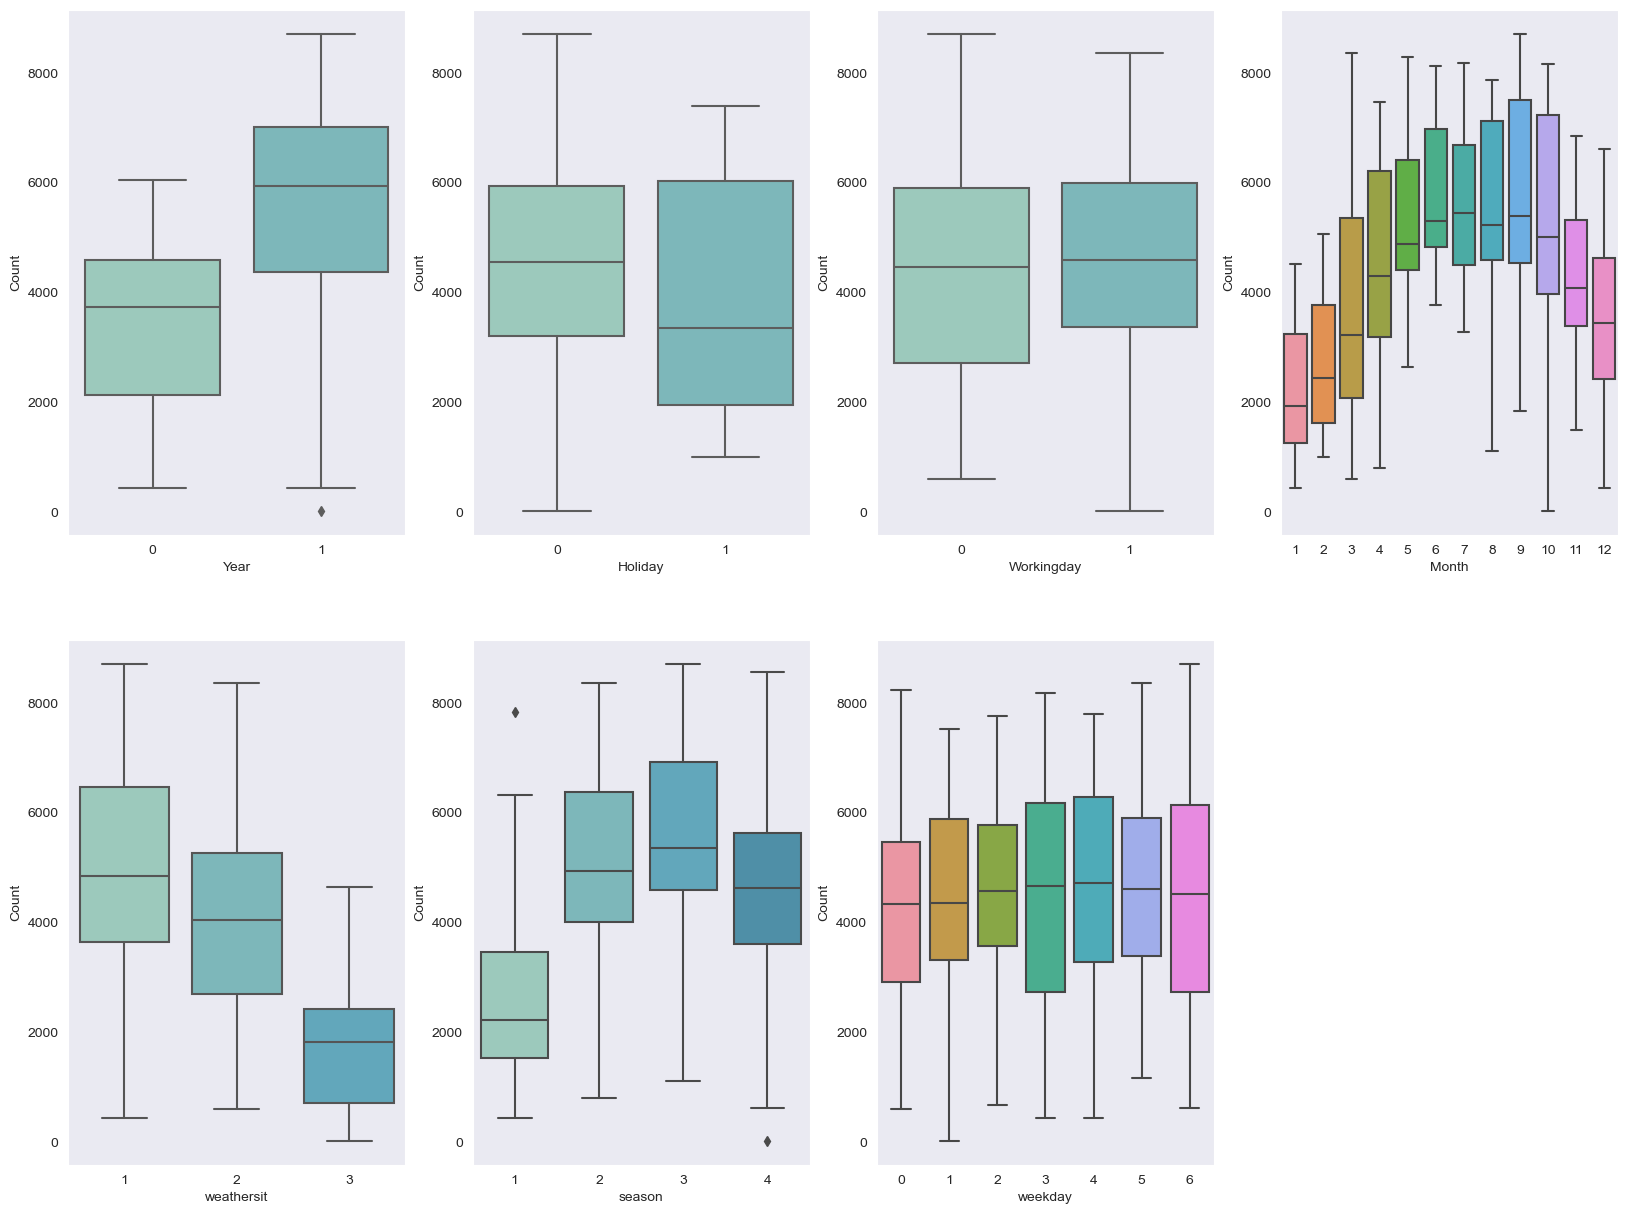

In [16]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(30,20),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plot_dim = [3,3]
fig,axs = plt.subplots(*plot_dim)
fig.set_figheight(15)
fig.set_figwidth(20)
#plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'Count', data = bikesharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'Holiday', y = 'Count', data = bikesharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'Workingday', y = 'Count', data = bikesharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'Month', y = 'Count', data = bikesharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'Count', data = bikesharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'Count', data = bikesharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'Count', data = bikesharing)
axs[2,1].set_axis_off()
axs[2,2].set_axis_off()

### Obervations - The plots above shows the relationship between categorical variables and Target variable "Count"
 - Bike Demand are more in the year 2019 compared to 2018
 - Bike Demand are more Aug, Sep and Oct month in comparision to other month
 - Bike Demand are more in clear weather then mist
 - Bike Demand are more during the Fall season and then in summer
 - Bike Rentals are more on wednesday, thursday and Saturday

### Get the dummy variables for Weathersit, Season, Weekday & Month

In [17]:
# Dummy variable creation
Season = pd.get_dummies(bikesharing['season'])
Weekday = pd.get_dummies(bikesharing['weekday'])
Weathersit = pd.get_dummies(bikesharing['weathersit'])
Month1 = pd.get_dummies(bikesharing['Month'])

In [18]:
# Assigning appropriate column value for each dummy variable
season_desc = Season.rename(columns={1:'Spring',2:'Summer',3:'Fall',4:'Winter'}, inplace = False)
Weeks = Weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',\
                                6:'Saturday',0:'Sunday'},inplace = False)
Weasits = Weathersit.rename(columns = {1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)
Months = Month1.rename(columns={ 1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May', \
                               6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)


In [19]:
# Convatenating the Dummay variables with Bikesharing data
bikesharing = pd.concat((bikesharing,season_desc), axis = 1)
bikesharing = pd.concat((bikesharing,Weeks),axis=1)
bikesharing = pd.concat((bikesharing,Weasits), axis =1)
bikesharing = pd.concat((bikesharing,Months),axis=1)


In [20]:
# Displaying the fetched data, added to first 5 default rows to manually visualize the data
bikesharing.head()

,season,Year,Month,Holiday,weekday,Workingday,weathersit,Temp,atemp,Humidity,Windspeed,Count,Spring,Summer,Fall,Winter,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Dropping variables which are redundant.
# Since any one of variable can be explained by remaning others. so we can drop 'Spring','Sunday', 'Jan'
bikesharing.drop(['season','Spring','weekday','Sunday','weathersit','Month','Jan'], axis = 1, inplace = True)


In [22]:
# Displaying the fetched data, added to first 10 default rows to manually visualize the data
bikesharing.head(10)

,Year,Holiday,Workingday,Temp,atemp,Humidity,Windspeed,Count,Summer,Fall,Winter,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Reveiwing the left over variables
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        730 non-null    int64  
 1   Holiday     730 non-null    int64  
 2   Workingday  730 non-null    int64  
 3   Temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   Humidity    730 non-null    float64
 6   Windspeed   730 non-null    float64
 7   Count       730 non-null    int64  
 8   Summer      730 non-null    uint8  
 9   Fall        730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Monday      730 non-null    uint8  
 12  Tuesday     730 non-null    uint8  
 13  Wednesday   730 non-null    uint8  
 14  Thrusday    730 non-null    uint8  
 15  Friday      730 non-null    uint8  
 16  Saturday    730 non-null    uint8  
 17  Clear       730 non-null    uint8  
 18  Mist        730 non-null    uint8  
 19  Light       730 non-null    u

## Visualizing Numerical Variables

In [24]:
# Summary statistics of numerical variables
bikesharing[['Temp','atemp','Humidity','Windspeed','Count']].describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
Humidity,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
Windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
Count,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


<Figure size 2000x1000 with 0 Axes>

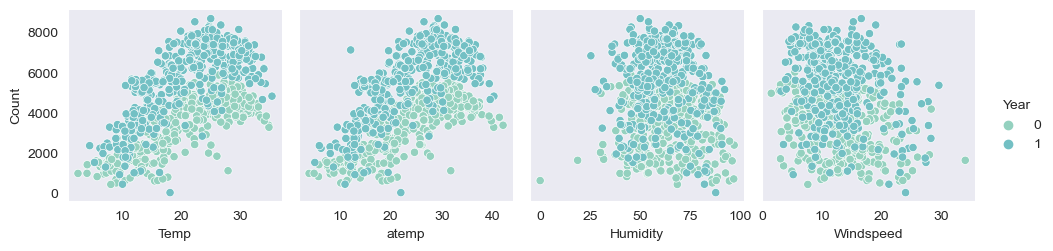

In [25]:
# Scatter Plots of Continuous variables vs 'cnt'
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
sns.pairplot(bikesharing, x_vars=['Temp','atemp','Humidity','Windspeed'],y_vars='Count',hue ='Year')
plt.show()

### Obervation
-  Above plot shows Temp and Count are having significant possibility of positive linear regression

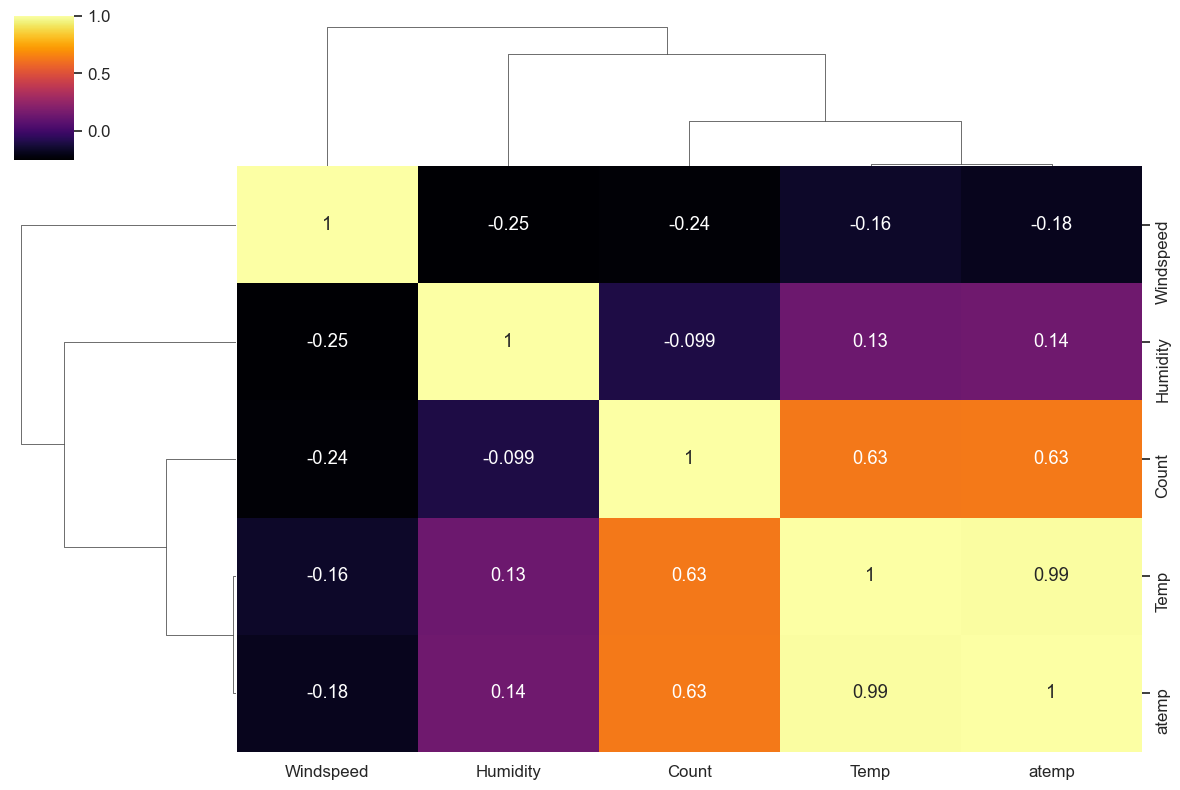

In [26]:
numeric_columns = ["Temp",'atemp', 'Windspeed',"Humidity",'Count']
correlation_matrix = bikesharing[numeric_columns].corr()
sns.set(font_scale=1.1)
sns.clustermap(correlation_matrix,annot=True,figsize=(12, 8),cmap="inferno")
plt.show()

In [27]:
bikesharing.drop(['atemp'], axis = 1, inplace = True)

### Observation -
 - It can observed with above correlation analysis temp and atemp are highlighly correlated hence dropping atemp.
 - It can be oberved with above cnt vs temp there is significant positive linearity between both variable hence linear regression model can be used.
 

In [28]:
# Displaying the fetched data, added to first 5 default rows to manually visualize the data
bikesharing.head(5)

,Year,Holiday,Workingday,Temp,Humidity,Windspeed,Count,Summer,Fall,Winter,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Outliers Analysis on numerical variables

0.75    26.880615
0.80    28.125992
0.85    29.144153
0.88    29.640260
0.90    29.998347
0.92    30.613347
0.93    30.850450
0.94    31.305543
0.95    31.520460
0.96    31.803689
0.97    32.052787
0.98    32.999536
0.99    33.868050
Name: Temp, dtype: float64


<AxesSubplot:xlabel='Temp'>

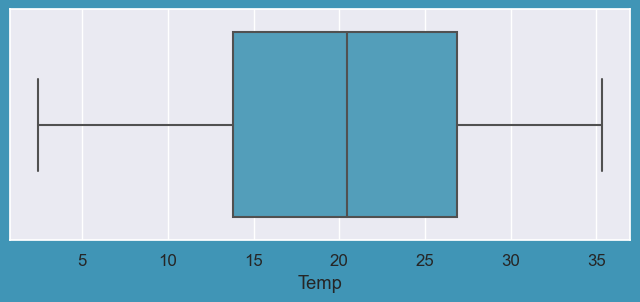

In [29]:
quantile_info_temp = bikesharing.Temp.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_temp)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(bikesharing.Temp,palette='GnBu_d')

0.75    15.625589
0.80    16.639785
0.85    18.128709
0.88    19.221429
0.90    19.833997
0.92    20.625403
0.93    21.498307
0.94    22.438102
0.95    22.999988
0.96    23.302876
0.97    23.999167
0.98    25.201627
0.99    27.380948
Name: Windspeed, dtype: float64


<AxesSubplot:xlabel='Windspeed'>

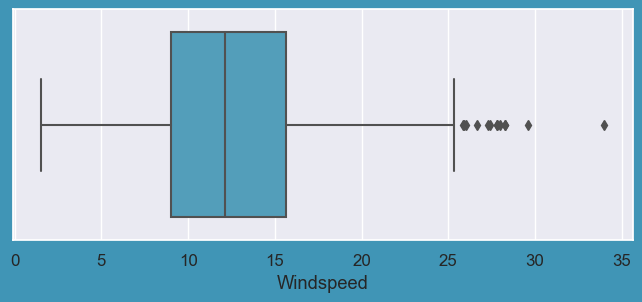

In [30]:
quantile_info_Windspeed = bikesharing.Windspeed.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_Windspeed)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(bikesharing.Windspeed,palette='GnBu_d')

0.75    72.989575
0.80    75.291700
0.85    77.568740
0.88    80.583300
0.90    81.762500
0.92    83.541700
0.93    84.410448
0.94    85.771658
0.95    86.868735
0.96    88.118328
0.97    89.540550
0.98    90.830814
0.99    92.795857
Name: Humidity, dtype: float64


<AxesSubplot:xlabel='Humidity'>

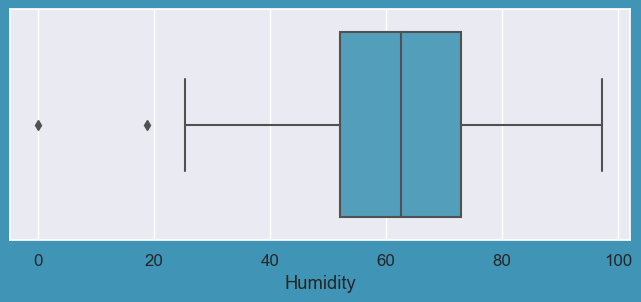

In [31]:
quantile_info_Humidity = bikesharing.Humidity.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_Humidity)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(bikesharing.Humidity,palette='GnBu_d')

### Obervation -
 - It can be observed there is no major impact of outliers on the dataset hence no outliers treatment is required

## Step 3: Splitting the Data into Training and Testing Sets

In [32]:
# Displaying the fetched data, added to first 10 default rows to manually visualize the data
bikesharing.head(10)

,Year,Holiday,Workingday,Temp,Humidity,Windspeed,Count,Summer,Fall,Winter,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
#Below representing the number of rows - 730 & Column - 30 in dataset
bikesharing.shape

(730, 30)

In [34]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
#Below representing the number of rows - 730 & Column - 30 train and test dataset
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


## Step 4 : Rescaling the Features  and Feature Selection(Recursive Feature Elimination)

### Rescaling the Feature
Rescaling is required to make numerical variables unit less to avoid having one varible higher weightage

In [36]:
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['Temp', 'Windspeed',"Humidity",'Count']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

# Observation - It can be seen all numerical and categorical values are falling under 0 to 1 range

,count,mean,std,min,25%,50%,75%,max
Year,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
Holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
Workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
Temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
Humidity,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
Windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
Count,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
Summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
Fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
Winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


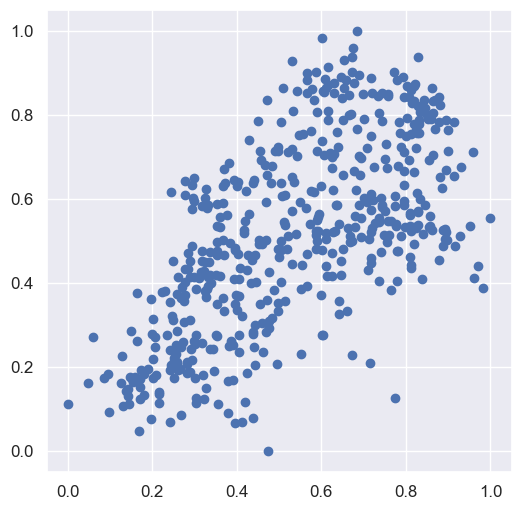

In [37]:
# Plot to show possible positive linear regression between temp and count
plt.figure(figsize=[6,6])
plt.scatter(df_train.Temp, df_train.Count)
plt.show()

In [38]:
### Dividing into X and Y sets for the model building
y_train = df_train.pop('Count')
X_train = df_train
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


### Feature Selection using RFE(Recursive Feature Elimination)

In [39]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
# List of variable and ranking 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Holiday', True, 1),
 ('Workingday', True, 1),
 ('Temp', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 2),
 ('Winter', True, 1),
 ('Monday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Thrusday', True, 1),
 ('Friday', True, 1),
 ('Saturday', True, 1),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 3),
 ('Apr', False, 5),
 ('May', False, 4),
 ('Jun', False, 6),
 ('Jul', False, 10),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 8)]

In [41]:
# Extracting variables selected from RFE method
col = X_train.columns[rfe.support_]
col

Index(['Year', 'Holiday', 'Workingday', 'Temp', 'Humidity', 'Windspeed',
       'Summer', 'Winter', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday',
       'Friday', 'Saturday', 'Clear', 'Mist', 'Light', 'Aug', 'Sep', 'Oct'],
      dtype='object')

In [42]:
# Extracting variables which are not selected from RFE method
X_train.columns[~rfe.support_]

Index(['Fall', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec'], dtype='object')

## Step 4 : Building a linear model

In [43]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Variables 
X_train_rfe.columns

Index(['Year', 'Holiday', 'Workingday', 'Temp', 'Humidity', 'Windspeed',
       'Summer', 'Winter', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday',
       'Friday', 'Saturday', 'Clear', 'Mist', 'Light', 'Aug', 'Sep', 'Oct'],
      dtype='object')

In [45]:
X_train_rfe1 = sm.add_constant(X_train_rfe) # Adding a constant variable 
lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          3.01e-188
Time:                        03:34:58   Log-Likelihood:                 520.51
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0669      0.025      2.629      0.0

### Obeservation - 'Thursday' is insignificant in presence of other variables due to high p-value, can be dropped

In [46]:
X_train_new = X_train_rfe.drop(["Thrusday"], axis = 1)

**Rebuilding Model without 'Thursday' variable**

In [47]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          3.01e-188
Time:                        03:34:58   Log-Likelihood:                 520.51
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0669      0.025      2.629      0.0

### Obeservation - 'Wednesday' is insignificant in presence of other variables due to high p-value, can be dropped

In [48]:
X_train_new1 = X_train_new.drop(["Wednesday"], axis = 1)

**Rebuilding Model without 'Wednesday' variable**

In [49]:
X_train_lm1 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     162.7
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          2.37e-189
Time:                        03:34:58   Log-Likelihood:                 520.49
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     492   BIC:                            -928.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0668      0.025      2.629      0.0

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Light,inf
14,Mist,inf
13,Clear,inf
3,Workingday,2.33
5,Humidity,1.88
12,Saturday,1.79
8,Winter,1.72
4,Temp,1.59
18,Oct,1.50
16,Aug,1.46


### Obeservation - "Friday",'Tuesday','Monday' are insignificant in presence of other variables due to high p-value and based on above two model can be seen by removing days there is no significant change in R sqaure and Adusted R square hence dropping it

In [51]:
X_train_new2 = X_train_new1.drop(["Friday",'Tuesday','Monday'], axis = 1)

**Rebuilding Model without 'Friday','Tuesday','Monday' variable**

In [52]:
X_train_lm2 = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          3.24e-192
Time:                        03:34:59   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0692      0.025      2.731      0.0

In [53]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Clear,inf
11,Mist,inf
12,Light,inf
3,Workingday,1.88
5,Humidity,1.88
9,Saturday,1.79
8,Winter,1.72
4,Temp,1.59
15,Oct,1.49
13,Aug,1.46


### Obeservation - 'Clear' is insignificant in presence of other variables due to Infinity VIF however P value is significant, can be dropped

In [54]:
# Dropping highly correlated variables and insignificant variables
X_train_new3 = X_train_new2.drop(["Clear"], axis = 1)

**Rebuilding Model without 'Clear' variable**

In [55]:
X_train_lm3 = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          3.24e-192
Time:                        03:34:59   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.029      6.770      0.0

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity,16.59
3,Temp,10.01
2,Workingday,5.05
5,Windspeed,3.82
7,Winter,2.27
9,Mist,2.14
0,Year,2.03
8,Saturday,1.90
6,Summer,1.83
13,Oct,1.62


### Obeservation - 'Humidity' is insignificant in presence of other variables due to very high VIF however P value is significant, can be dropped

In [57]:
# Dropping highly correlated variables and insignificant variables
X_train_new4 = X_train_new3.drop(["Humidity"], axis = 1)

**Rebuilding Model without 'Humidity' variable**

In [58]:
X_train_lm4 = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          6.16e-189
Time:                        03:34:59   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0945      0.019      4.961      0.0

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Temp,6.38
2,Workingday,4.39
4,Windspeed,3.60
0,Year,2.02
6,Winter,2.02
5,Summer,1.82
7,Saturday,1.77
12,Oct,1.62
10,Aug,1.59
8,Mist,1.54


### Obeservation - As VIF of all the variables are still not <5 and P value of 'Holiday' is insignificant in presence of other variables due to bit high P value  hence can be dropped

In [60]:
# Dropping highly correlated variables and insignificant variables
X_train_new5 = X_train_new4.drop(["Holiday"], axis = 1)

**Rebuilding Model without 'Holiday' variable**

In [61]:
X_train_lm5 = sm.add_constant(X_train_new5)
lm = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          2.86e-189
Time:                        03:34:59   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.019      4.610      0.0

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temp,6.26
1,Workingday,4.07
3,Windspeed,3.49
0,Year,2.02
5,Winter,1.99
4,Summer,1.82
6,Saturday,1.70
11,Oct,1.61
9,Aug,1.59
7,Mist,1.54


### Obeservation - As VIF of the all variables are still not <5 and P value of 'Oct' is insignificant in presence of other variables due to bit high P value  hence can be dropped

In [63]:
# Dropping highly correlated variables and insignificant variables
X_train_new6 = X_train_new5.drop(["Oct"], axis = 1)

**Rebuilding Model without 'Oct' variable**

In [64]:
X_train_lm6 = sm.add_constant(X_train_new6)
lm = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          2.00e-189
Time:                        03:34:59   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0813      0.019      4.384      0.0

In [65]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temp,6.10
1,Workingday,4.04
3,Windspeed,3.49
0,Year,2.02
4,Summer,1.81
6,Saturday,1.69
9,Aug,1.58
7,Mist,1.54
5,Winter,1.51
10,Sep,1.30


### Obeservation - As VIF of the all variables are still not <5 and P value of 'Aug' is insignificant in presence of other variables due to bit high P value  hence can be dropped

In [66]:
# Dropping highly correlated variables and insignificant variables
X_train_new7 = X_train_new6.drop(["Aug"], axis = 1)

**Rebuilding Model without 'Aug' variable**

In [67]:
X_train_lm7 = sm.add_constant(X_train_new7)
lm = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          1.47e-188
Time:                        03:34:59   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

In [68]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temp,4.76
1,Workingday,4.04
3,Windspeed,3.43
0,Year,2.02
6,Saturday,1.69
4,Summer,1.57
7,Mist,1.53
5,Winter,1.40
9,Sep,1.20
8,Light,1.08


### The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

- **R-squared - 83.6%**
- **Adusted R-squared - 83.2%**

## Residual Analysis of the train data

In [69]:
#y train predicted
y_train_predict = lm.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

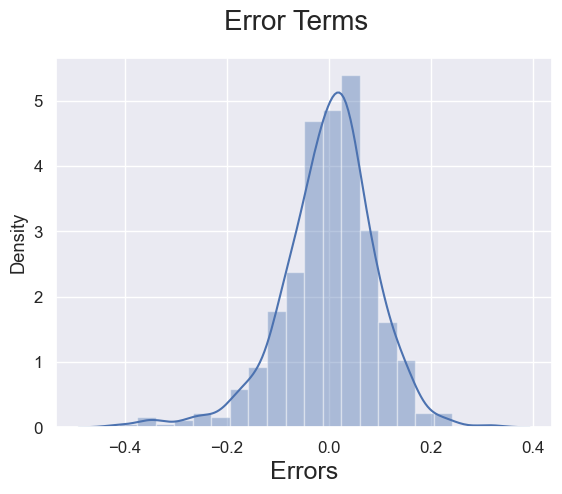

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**We can see Error Terms are normally distributed with mean Zero. Hence Model is actaully following the assumption of Normality.**

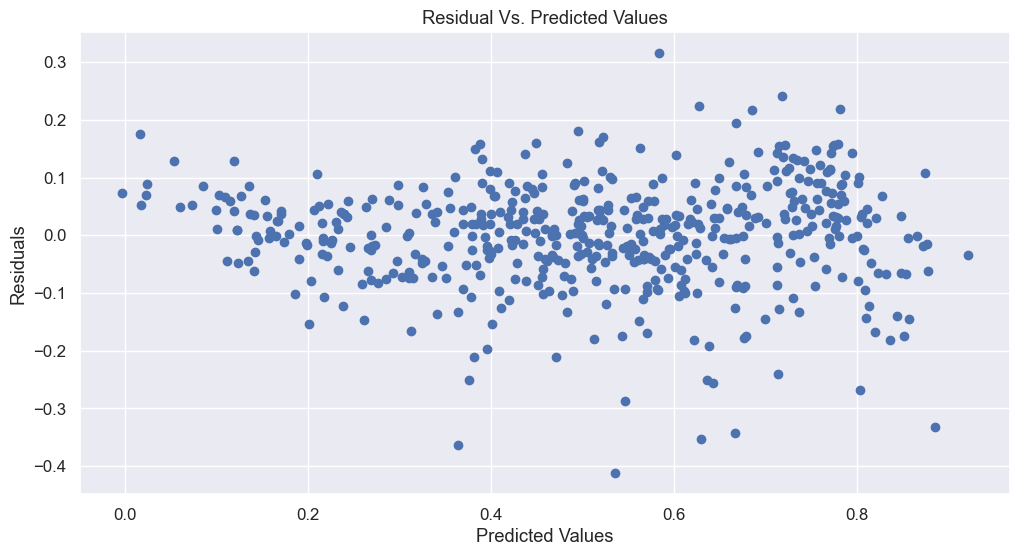

In [71]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_predict,y_train - y_train_predict)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**We can see there is no specific pattern observed in the Error Terms with respect to Prediction, hence we can say
Error terms are independent of each other.**

## Step 5: Making Predictions Using the Final Model

In [72]:
# Applying scaling on test data, only transform
num_vars = ['Temp', 'Windspeed',"Humidity",'Count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
#Dividing into X_test and y_test
y_test = df_test.pop('Count')
X_test = df_test

In [74]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [75]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Finding R-squared and Adjusted R-Squared forvTest dataset

In [76]:
r2_score(y_test,y_pred)

0.7955844377237249

In [77]:
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


### The Final Model accuray is around 79.5%, Which is a Good Score.

### The Model accuracy difference between the Train and Test Data is less than ~4% which is acceptable as it is not crssing 5% acceptable limit

## Step 6: Model Evaluation

Text(0, 0.5, 'y_pred')

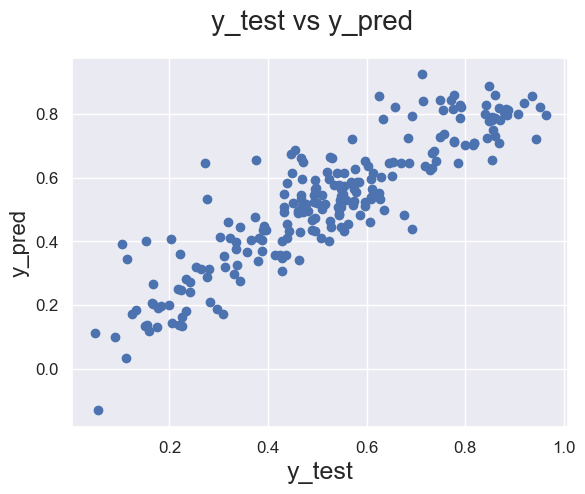

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

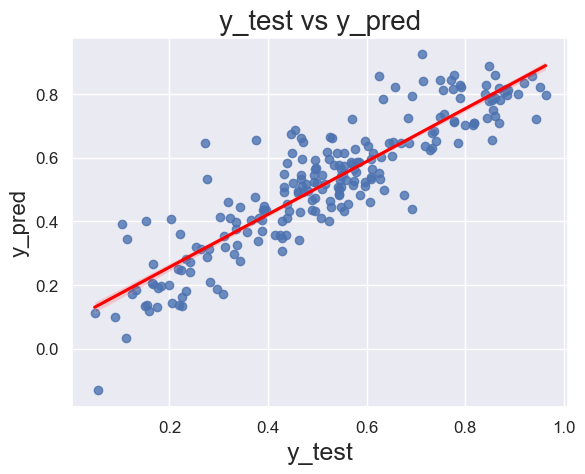

In [79]:
# Visualizing the best fit line 
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### We can see that the equation of our best fittline is:
### Count = 0.549 * Temp + 0.2331 * Year + 0.0563 * Workingday - 0.1552 * Windspeed + 0.0874 * Summer + 0.1318 * Winter + 0.0677 * Saturday - 0.0813 * Mist - 0.2880 * Light + 0.0972 * Sep

### Insights

- Temp is most significant variable which effect the business positively.
- Bad weather like Mist, Light & Windspeed effect business negatively.
- Demand of biles are more in Winter and Summer in comparision to rainy and windy season.
- In year 2019 Boombike sales goes up in comparision to 2018 which shows company is doing good business and model shows significantly positive related with Year